In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# native_exon_inclusion_file = "Data/se_splice_data/HepG2_natively_included_cassette_exons"
# native_exon_exclusion_file = "Data/se_splice_data/HepG2_natively_excluded_cassette_exons"

native_exon_inclusion_file = "Data/se_splice_data/K562_natively_included_cassette_exons"
native_exon_exclusion_file = "Data/se_splice_data/K562_natively_excluded_cassette_exons"
native_exon_all_file = "Data/se_splice_data/K562_native_cassette_exons_all"
native_exon_constitutive_file = "Data/se_splice_data/K562_constitutive_exons"

CONST = 500

In [3]:
df_ex_inc = pd.read_csv(native_exon_inclusion_file, sep='\t')
df_ex_exc = pd.read_csv(native_exon_exclusion_file, sep='\t')
df_ex_con = pd.read_csv(native_exon_constitutive_file, sep='\t')
df_ex_all = pd.read_csv(native_exon_all_file, sep='\t')
print(df_ex_exc.head())

                                          annotation           low_exon  \
0  chr1|-|1653150-1654026|1654073-1654146|1653150...    1653034-1653150   
1  chr1|-|1688047-1688217|1688321-1688619|1688047...    1687941-1688047   
2  chr1|-|2121220-2124283|2124414-2125077|2121220...    2121151-2121220   
3  chr1|+|10165802-10166254|10166641-10177516|101...  10165573-10165802   
4  chr1|+|11805894-11806183|11806280-11807496|118...  11805859-11805894   

        skipped_exon            hi_exon       incl         excl  
0    1654026-1654073    1654146-1654270  2192,7868  17572,63166  
1    1688217-1688321    1688619-1688707   693,4821   5748,33635  
2    2124283-2124414    2125077-2125349   986,2600   8067,21547  
3  10166254-10166641  10177516-10177658   388,2672   3166,18937  
4  11806183-11806280  11807496-11807602  1152,3470   9400,25577  


## Compute PSI values for exons:

In [4]:
def compute_psi(row, exp_num, read_length=100):
    inc_exc_1 = row['incl'] # incl, excl labels seem to be inaccurate in the original files!
    inc_exc_2 = row['excl']
    inc_exc = [inc_exc_1, inc_exc_2]
    
    inc, exc = [int(num) for num in inc_exc[exp_num].split(',')]
    
    exon_start, exon_end = [int(num) for num in row['skipped_exon'].split('-')]
    exon_length = exon_end-exon_start+1
    
    # IR_norm = inc/(exon_length + read_length - 1.)
    IR_norm = inc/(read_length - 1.)
    ER_norm = exc/(read_length - 1.)
    
    psi = IR_norm/(IR_norm+ER_norm)
    return psi

In [5]:
def compute_length(row):
    exon_start, exon_end = [int(num) for num in row['skipped_exon'].split('-')]
    exon_length = exon_end-exon_start+1
    return exon_length

0.769019537205901
0.9769866729369965
0.9284718275865678


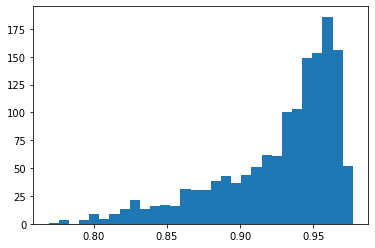

In [6]:
df_ex_inc['psi_1'] = df_ex_inc.apply(lambda row: compute_psi(row, 0), axis=1)
df_ex_inc['psi_2'] = df_ex_inc.apply(lambda row: compute_psi(row, 1), axis=1)
df_ex_inc['length'] = df_ex_inc.apply(lambda row: compute_length(row), axis=1)
df_ex_inc['avg'] = (df_ex_inc['psi_1'] + df_ex_inc['psi_2'])/2.
# print(df_ex_inc.head())

plt.hist(df_ex_inc['avg'], bins=30)
print(min(df_ex_inc['avg']))
print(max(df_ex_inc['avg']))
print(np.mean(df_ex_inc['psi_1']))
plt.savefig('including_psi_hist.png')

Empty DataFrame
Columns: [annotation, low_exon, skipped_exon, hi_exon, incl, excl, psi_1, psi_2, length, avg]
Index: []
too long 16
too short: 7
4
5081


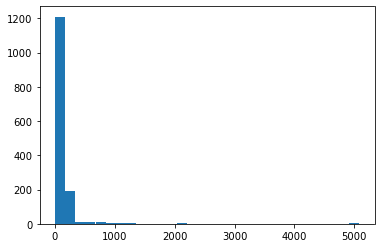

In [7]:
df_ex_inc_weird = df_ex_inc[df_ex_inc['avg'] < 0.5]
print(df_ex_inc_weird)

print('too long', len(df_ex_inc[df_ex_inc['length'] > 1000]))
print('too short:', len(df_ex_inc[df_ex_inc['length'] < 20]))
plt.hist(df_ex_inc['length'], bins=30)
print(min(df_ex_inc['length']))
print(max(df_ex_inc['length']))

0.09187691787054503
0.5114636096143341


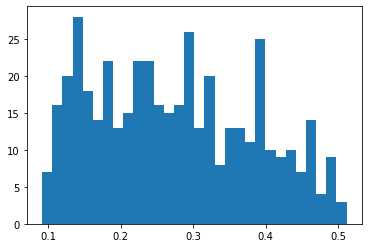

In [8]:
df_ex_exc['psi_1'] = df_ex_exc.apply(lambda row: compute_psi(row, 0), axis=1)
df_ex_exc['psi_2'] = df_ex_exc.apply(lambda row: compute_psi(row, 1), axis=1)
df_ex_exc['avg'] = (df_ex_exc['psi_1'] + df_ex_exc['psi_2'])/2.
# print(df_ex_exc.head())

plt.hist(df_ex_exc['avg'], bins=30)
print(min(df_ex_exc['avg']))
print(max(df_ex_exc['avg']))
plt.savefig('excluding_psi_hist.png')

0.09264094955489614
0.9768912987348309
0.7667172481628632
284
417


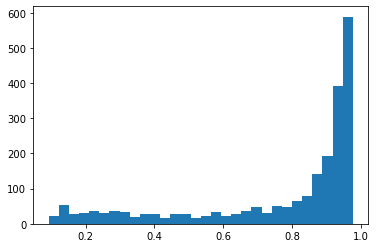

In [9]:
df_ex_all['psi_1'] = df_ex_all.apply(lambda row: compute_psi(row, 0), axis=1)
df_ex_all['psi_2'] = df_ex_all.apply(lambda row: compute_psi(row, 1), axis=1)
df_ex_all['length'] = df_ex_all.apply(lambda row: compute_length(row), axis=1)
df_ex_all['avg'] = (df_ex_all['psi_1'] + df_ex_all['psi_2'])/2.
# print(df_ex_inc.head())

plt.hist(df_ex_all['avg'], bins=30)
print(min(df_ex_all['psi_1']))
print(max(df_ex_all['psi_1']))
print(np.mean(df_ex_all['psi_1']))
# plt.savefig('all_psi_hist.png')

df_ex_all_filtered = df_ex_all[df_ex_all['avg'] >= 0.5114637]
df_ex_all_filtered = df_ex_all_filtered[df_ex_all_filtered['avg'] <= 0.7690195]
print(len(df_ex_all_filtered))

exc_inc_rbps_set = set(df_ex_exc['annotation']) | set(df_ex_inc['annotation'])
df_ex_all_filtered = df_ex_all[~ df_ex_all['annotation'].isin(exc_inc_rbps_set)]
print(len(df_ex_all_filtered))

In [10]:
meta_data_file = "Data/RBPs/bedfiles_metadata.csv"
meta_data = pd.read_csv(meta_data_file)
# print(meta_data.head())
meta_hg19 = meta_data[(meta_data["assembly"]=='hg19') & (meta_data["cell_name"]=='K562') & (meta_data["rep_num"]=='1, 2')].reset_index(drop=True)
# print(meta_hg19.head())
print('total RBPs considered:', len(meta_hg19))

total RBPs considered: 120


In [11]:
rbp_dict = {}
len_list = []
avg_len_list = []
for idx, row in meta_hg19.iterrows():
    stub = row["stub"]
    target = row["target"]
    rbp_file = "Data/RBPs/bed_files/"+ stub +".bed.gz"
    df_rbp = pd.read_csv(rbp_file, header=None, sep='\t')
    df_rbp['len'] = df_rbp[2] - df_rbp[1] + 1
    avg_len = np.mean(df_rbp['len'])
    avg_len_list.append(avg_len)
    rbp_dict[target] = df_rbp
    len_list.append(len(df_rbp))
meta_hg19['site_count'] = len_list
meta_hg19['avg_len'] = avg_len_list
meta_hg19 = meta_hg19.sort_values(by='site_count', ascending=True)
print(meta_hg19.head())
print('max_avg_len:', np.max(meta_hg19['avg_len']))
print('min_avg_len:', np.min(meta_hg19['avg_len']))
print('avg_len:', np.mean(meta_hg19['avg_len']))

            stub    accession target rep_num cell_name assembly  site_count  \
81   ENCFF105PMR  ENCFF105PMR   SBDS    1, 2      K562     hg19           9   
11   ENCFF832JDM  ENCFF832JDM   UTP3    1, 2      K562     hg19          19   
1    ENCFF470JIH  ENCFF470JIH   PUS1    1, 2      K562     hg19          25   
61   ENCFF803GSP  ENCFF803GSP  RPS11    1, 2      K562     hg19          28   
115  ENCFF322GPD  ENCFF322GPD  SF3B1    1, 2      K562     hg19          29   

       avg_len  
81   37.444444  
11   18.052632  
1    28.840000  
61   36.857143  
115  46.689655  
max_avg_len: 94.52269736842105
min_avg_len: 16.12269938650307
avg_len: 59.33211306609601


(array([42., 17.,  6.,  8.,  6.,  6.,  4.,  4.,  6.,  2.,  3.,  1.,  1.,
         1.,  2.,  0.,  3.,  1.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,
         0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         1.]),
 array([9.00000e+00, 6.57200e+02, 1.30540e+03, 1.95360e+03, 2.60180e+03,
        3.25000e+03, 3.89820e+03, 4.54640e+03, 5.19460e+03, 5.84280e+03,
        6.49100e+03, 7.13920e+03, 7.78740e+03, 8.43560e+03, 9.08380e+03,
        9.73200e+03, 1.03802e+04, 1.10284e+04, 1.16766e+04, 1.23248e+04,
        1.29730e+04, 1.36212e+04, 1.42694e+04, 1.49176e+04, 1.55658e+04,
        1.62140e+04, 1.68622e+04, 1.75104e+04, 1.81586e+04, 1.88068e+04,
        1.94550e+04, 2.01032e+04, 2.07514e+04, 2.13996e+04, 2.20478e+04,
        2.26960e+04, 2.33442e+04, 2.39924e+04, 2.46406e+04, 2.52888e+04,
        2.59370e+04]),
 <BarContainer object of 40 artists>)

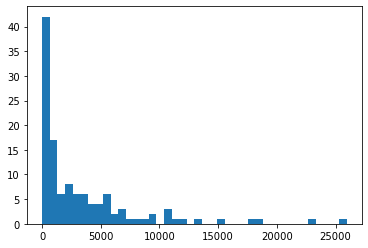

In [12]:
plt.hist(meta_hg19['site_count'], bins=40)

In [13]:
df_ex_inc['chr'] = df_ex_inc['annotation'].apply(lambda x: str(x).split("|")[0])
df_ex_inc['strand'] = df_ex_inc['annotation'].apply(lambda x: str(x).split("|")[1])
df_ex_inc['start'] = df_ex_inc['skipped_exon'].apply(lambda x: int(str(x).split("-")[0]))
df_ex_inc['end'] = df_ex_inc['skipped_exon'].apply(lambda x: int(str(x).split("-")[1]))
# print(df_ex_inc.head())
df_ex_inc_pos = df_ex_inc[df_ex_inc['strand'] == '+']
df_ex_inc_neg = df_ex_inc[df_ex_inc['strand'] == '-']

inc_pos_tups = list(zip(df_ex_inc_pos['chr'], zip(df_ex_inc_pos['start'], df_ex_inc_pos['end'])))
# pos_end_tups = list(zip(df_ex_inc_pos['chr'], df_ex_inc_pos['end']))

inc_neg_tups = list(zip(df_ex_inc_neg['chr'], zip(df_ex_inc_neg['start'], df_ex_inc_neg['end'])))
# neg_end_tups = list(zip(df_ex_inc_pos['chr'], df_ex_inc_neg['end']))
# print(inc_neg_tups[:10])

In [14]:
df_ex_exc['chr'] = df_ex_exc['annotation'].apply(lambda x: str(x).split("|")[0])
df_ex_exc['strand'] = df_ex_exc['annotation'].apply(lambda x: str(x).split("|")[1])
df_ex_exc['start'] = df_ex_exc['skipped_exon'].apply(lambda x: int(str(x).split("-")[0]))
df_ex_exc['end'] = df_ex_exc['skipped_exon'].apply(lambda x: int(str(x).split("-")[1]))
# print(df_ex_exc.head())
df_ex_exc_pos = df_ex_exc[df_ex_exc['strand'] == '+']
df_ex_exc_neg = df_ex_exc[df_ex_exc['strand'] == '-']

exc_pos_tups = list(zip(df_ex_exc_pos['chr'], zip(df_ex_exc_pos['start'], df_ex_exc_pos['end'])))

exc_neg_tups = list(zip(df_ex_exc_neg['chr'], zip(df_ex_exc_neg['start'], df_ex_exc_neg['end'])))
# print(exc_neg_tups[:10])

In [15]:
df_ex_con['chr'] = df_ex_con['annotation'].apply(lambda x: str(x).split("|")[0])
df_ex_con['strand'] = df_ex_con['annotation'].apply(lambda x: str(x).split("|")[1])
df_ex_con['start'] = df_ex_con['skipped_exon'].apply(lambda x: int(str(x).split("-")[0]))
df_ex_con['end'] = df_ex_con['skipped_exon'].apply(lambda x: int(str(x).split("-")[1]))
# print(df_ex_exc.head())
df_ex_con_pos = df_ex_con[df_ex_con['strand'] == '+']
df_ex_con_neg = df_ex_con[df_ex_con['strand'] == '-']

con_pos_tups = list(zip(df_ex_con_pos['chr'], zip(df_ex_con_pos['start'], df_ex_con_pos['end'])))

con_neg_tups = list(zip(df_ex_con_neg['chr'], zip(df_ex_con_neg['start'], df_ex_con_neg['end'])))
# print(exc_neg_tups[:10])

In [16]:
def tup_to_dict(tup_list):
    res_dict = {}
    for tup in tup_list:
        if tup[0] in res_dict:
            res_dict[tup[0]].append(tup[1])
        else:
            res_dict[tup[0]] = []
            res_dict[tup[0]].append(tup[1])
    return res_dict

inc_pos_dict = tup_to_dict(inc_pos_tups)
# pos_end_dict = tup_to_dict(pos_end_tups)

inc_neg_dict = tup_to_dict(inc_neg_tups)
# neg_end_dict = tup_to_dict(neg_end_tups)
print(inc_neg_dict.keys())


exc_pos_dict = tup_to_dict(exc_pos_tups)
exc_neg_dict = tup_to_dict(exc_neg_tups)

con_pos_dict = tup_to_dict(con_pos_tups)
con_neg_dict = tup_to_dict(con_neg_tups)

dict_keys(['chr1', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr2', 'chr20', 'chr21', 'chr22', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chrX'])


In [17]:
count_overlapping_exons = 0
for chrom in exc_pos_dict:
    tups = inc_pos_dict[chrom]
    for tup1_idx in range(len(tups)-1):
        tup1 = tups[tup1_idx]
        for tup2_idx in range(tup1_idx+1, len(tups)):
            tup2 = tups[tup2_idx]
            if tup1[0] < tup2[0] and tup1[1] > tup2[0]:
                print(tup1, tup2)
                count_overlapping_exons += 1 
            elif tup2[0] < tup1[0] and tup2[1] > tup1[0]:
                print(tup1, tup2)
                count_overlapping_exons += 1 
print('number of overlapping exons: ', count_overlapping_exons)

number of overlapping exons:  0


In [18]:
def get_buckets(df_rbp, exon_loci_dict, const=500):
    bucket_right = [0 for i in range(const)]
    bucket_left = [0 for i in range(const)]
    for idx, row in df_rbp.iterrows():
        chromosom = row[0]
        start = row[1]
        end = row[2]
        if chromosom in exon_loci_dict:
            for tup_str in exon_loci_dict[chromosom]:
                tup = (int(tup_str[0]), int(tup_str[1]))
                if tup[1] >= end and tup[0] >= start and tup[0] <= end + const:
                    idx_start = max(0, tup[0] - end -1)
                    idx_end = min(const-1, tup[0] - start -1)
                    for i in range(idx_start, idx_end+1):
                        bucket_left[i] += 1
                elif tup[0] <= start and tup[1] <= end and tup[1] >= start - const:
                    idx_start = max(0, start-tup[1] -1)
                    idx_end = min(const-1, end-tup[1] -1)
                    for i in range(idx_start, idx_end+1):
                        bucket_right[i] += 1

    return np.array(bucket_right), np.array(bucket_left)
            

# Processing an RBP:

In [19]:
df_rbp = rbp_dict['AQR']
print(df_rbp.head())
df_rbp_pos = df_rbp[df_rbp[5] == '+']
df_rbp_neg = df_rbp[df_rbp[5] == '-']
print(len(df_rbp))

       0          1          2             3     4  5         6          7  8  \
0   chr1   45980491   45980544  AQR_K562_IDR  1000  -  4.643392   6.991204 -1   
1  chr16   28967237   28967365  AQR_K562_IDR  1000  +  4.102966  28.879887 -1   
2   chr1  155891600  155891630  AQR_K562_IDR  1000  -  3.715484   6.320524 -1   
3  chr16   72132514   72132566  AQR_K562_IDR  1000  +  5.621119   6.753203 -1   
4   chr1  247493223  247493244  AQR_K562_IDR  1000  -  4.085044   5.479262 -1   

   9  len  
0 -1   54  
1 -1  129  
2 -1   31  
3 -1   53  
4 -1   22  
25937


In [20]:
inc_pos_bucket_right, inc_pos_bucket_left = get_buckets(df_rbp_pos, inc_pos_dict)
inc_neg_bucket_left, inc_neg_bucket_right = get_buckets(df_rbp_neg, inc_neg_dict)

inc_bucket_right = inc_pos_bucket_right + inc_neg_bucket_right
inc_bucket_left = inc_pos_bucket_left + inc_neg_bucket_left

# inc_bucket_right = 100*inc_bucket_right/np.sum(inc_bucket_right)
# inc_bucket_left = 100*inc_bucket_left/np.sum(inc_bucket_left)

500


<Figure size 432x288 with 0 Axes>

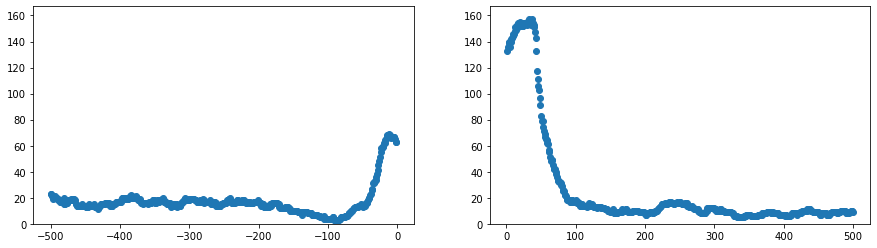

In [21]:
y_limit = max(max(inc_bucket_left), max(inc_bucket_right)) + 10

plt.tight_layout()
plt.figure(figsize=(15, 4))
ax_1 = plt.subplot(1, 2, 1)
print(len(inc_bucket_left))
ax_1.scatter([i for i in range(-CONST,0,1)], np.flip(inc_bucket_left))
ax_1.set_ylim([0, y_limit])

ax_2 = plt.subplot(1, 2, 2)
ax_2.scatter([i for i in range(1,CONST+1,1)], inc_bucket_right)
ax_2.set_ylim([0, y_limit])
plt.savefig('inc_buckets.jpg', dpi=400)

In [22]:
exc_pos_bucket_right, exc_pos_bucket_left = get_buckets(df_rbp_pos, exc_pos_dict)
exc_neg_bucket_left, exc_neg_bucket_right = get_buckets(df_rbp_neg, exc_neg_dict)

exc_bucket_right = exc_pos_bucket_right + exc_neg_bucket_right
exc_bucket_left = exc_pos_bucket_left + exc_neg_bucket_left

# exc_bucket_right = 100*exc_bucket_right/np.sum(exc_bucket_right)
# exc_bucket_left = 100*exc_bucket_left/np.sum(exc_bucket_left)

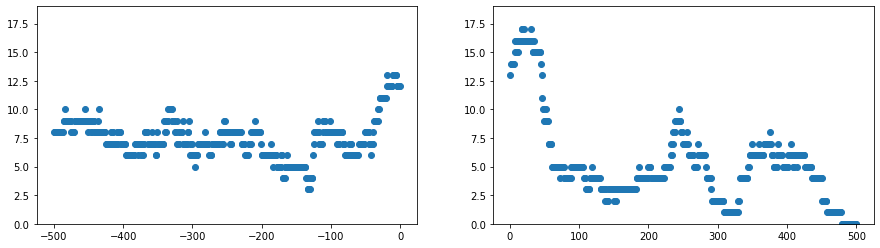

In [23]:
y_limit = max(max(exc_bucket_left), max(exc_bucket_right)) + 2

plt.figure(figsize=(15, 4))
ax_1 = plt.subplot(1, 2, 1)
ax_1.scatter([i for i in range(-CONST,0,1)], np.flip(exc_bucket_left))
ax_1.set_ylim([0, y_limit])

ax_2 = plt.subplot(1, 2, 2)
ax_2.scatter([i for i in range(1,CONST+1,1)], exc_bucket_right)
ax_2.set_ylim([0, y_limit])

plt.savefig('exc_buckets.jpg', dpi=400)

# Processing all the RBPs:

total count: 409839
max:  401
min:  2
mean:  62.02960918799821
less than 10:  11655
greater than 250:  109


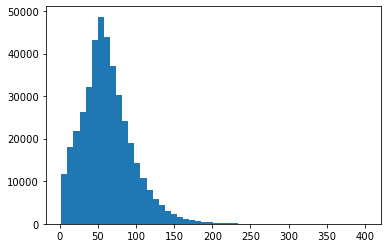

In [24]:
all_len_list = []
for rbp_name in rbp_dict:
    rbp = rbp_dict[rbp_name]
    all_len_list += list(rbp['len'])
plt.hist(all_len_list, bins=50)
print('total count:', len(all_len_list))
print('max: ', np.max(all_len_list))
print('min: ', np.min(all_len_list))
print('mean: ', np.mean(all_len_list))
print('less than 10: ', np.sum(np.array(all_len_list) < 10))
print('greater than 250: ', np.sum(np.array(all_len_list) > 250))

In [25]:
def generate_data(rbps, exon_loci_df, const=5000, strand='+'):
    rows = []
    for rbp in rbps:
        df_rbp_both = rbps[rbp]
        df_rbp = df_rbp_both[df_rbp_both[5] == strand]

        for idx, row in df_rbp.iterrows():
            chromosom = row[0]
            start = row[1]
            end = row[2]
            exon_df = exon_loci_df[exon_loci_df['chr']==chromosom]
            
            for exon_idx, exon_row in exon_df.iterrows():
                tup = (int(exon_row['start']), int(exon_row['end']))
                if (start >= tup[1] and start - tup[1] <= const) or (tup[0] >= end and tup[0] - end <= const) or (start >= tup[0] and start <= tup[1]) or (tup[1] >= end and end >= tup[0]): 
                    new_row = (exon_idx, chromosom, tup[0], tup[1], rbp, start, end, strand)
                    rows.append(new_row)
                elif (start >= tup[0] and end <= tup[1]):
                    new_row = (exon_idx, chromosom, tup[0], tup[1], rbp, start, end, strand)
                    rows.append(new_row)
                    print('in exon: ', new_row)
                elif (start <= tup[0] and end >= tup[1]):
                    new_row = (exon_idx, chromosom, tup[0], tup[1], rbp, start, end, strand)
                    rows.append(new_row)
                    print('spans exon: ', new_row)
    df = pd.DataFrame(rows, columns=['exon_idx', 'chr', 'exon_start', 'exon_end', 'rbp', 'rbp_start', 'rbp_end', 'strand'])
    return df

## Run this section only if you do not want to use precomputed tables:

In [367]:
excluding_pos_df = generate_data(rbp_dict, df_ex_exc_pos, const=5000, strand='+')
excluding_neg_df = generate_data(rbp_dict, df_ex_exc_neg, const=5000, strand='-')

spans exon:  (276, 'chr21', 38529462, 38529516, 'PRPF8', 38529456, 38529530, '+')
spans exon:  (288, 'chr3', 9478533, 9478572, 'U2AF2', 9478516, 9478576, '+')
spans exon:  (180, 'chr16', 89975373, 89975491, 'CSTF2T', 89975354, 89975528, '+')
spans exon:  (376, 'chr7', 26237450, 26237486, 'U2AF1', 26237429, 26237498, '-')
spans exon:  (409, 'chr8', 86131551, 86131592, 'BUD13', 86131510, 86131607, '-')
spans exon:  (128, 'chr12', 110936624, 110936664, 'BUD13', 110936596, 110936693, '-')
spans exon:  (376, 'chr7', 26237450, 26237486, 'ZRANB2', 26237447, 26237493, '-')
spans exon:  (399, 'chr7', 158496340, 158496393, 'PRPF8', 158496334, 158496400, '-')
spans exon:  (45, 'chr1', 185275616, 185275757, 'GRWD1', 185275574, 185275762, '-')
spans exon:  (191, 'chr17', 49109041, 49109083, 'U2AF2', 49109016, 49109102, '-')
spans exon:  (376, 'chr7', 26237450, 26237486, 'U2AF2', 26237449, 26237496, '-')
spans exon:  (138, 'chr13', 107209906, 107209964, 'SRSF1', 107209847, 107209967, '-')


In [373]:
# excluding_pos_df['strand'] = ['+' for i in range(len(excluding_pos_df))]
print(excluding_pos_df.head())
# excluding_neg_df['strand'] = ['-' for i in range(len(excluding_neg_df))]
print(excluding_neg_df.head())
excluding_df = pd.concat([excluding_pos_df, excluding_neg_df]).reset_index(drop=True)
print(excluding_df.head())
# excluding_df.to_csv('excluding_df_K562.csv')

   exon_idx    chr  exon_start  exon_end     rbp  rbp_start   rbp_end strand
0       358   chr6    31804200  31804294     SSB   31803039  31803063      +
1       358   chr6    31804200  31804294     SSB   31803063  31803066      +
2       358   chr6    31804200  31804294     SSB   31803066  31803078      +
3       358   chr6    31804200  31804294     SSB   31803078  31803100      +
4       120  chr12    56554409  56554454  PABPC4   56552144  56552185      +
   exon_idx    chr  exon_start   exon_end     rbp  rbp_start    rbp_end strand
0       179  chr16    88783944   88784023     SSB   88788174   88788216      -
1       205  chr18    47018105   47018203   UTP18   47015622   47015681      -
2        68  chr10   105155502  105155789  PABPC4  105152127  105152150      -
3       231   chr2    62115158   62115392  PABPC4   62115250   62115274      -
4         2   chr1     2124283    2124414  PABPC4    2125461    2125497      -
   exon_idx    chr  exon_start  exon_end     rbp  rbp_start   rb

In [ ]:
including_pos_df = generate_data(rbp_dict, df_ex_inc_pos, const=5000, strand='+')
including_neg_df = generate_data(rbp_dict, df_ex_inc_neg, const=5000, strand='-')

In [374]:
print(including_pos_df.head())
print(including_neg_df.head())

including_df = pd.concat([including_pos_df, including_neg_df]).reset_index(drop=True)
print(including_df.head())
# including_df.to_csv('including_df_K562.csv')

   exon_idx    chr  exon_start   exon_end     rbp  rbp_start    rbp_end strand
0       202  chr10    70516029   70516240   UTP18   70514925   70514997      +
1       159   chr1   228336071  228336240   UTP18  228333770  228333830      +
2       257  chr11    57505384   57505498  PABPC4   57510334   57510373      +
3       696  chr19     7712239    7712397  PABPC4    7712614    7712650      +
4       351  chr12    56553406   56553514  PABPC4   56552144   56552185      +
   exon_idx    chr  exon_start  exon_end    rbp  rbp_start   rbp_end strand
0       874  chr20    49225448  49225492    SSB   49225100  49225149      -
1       240  chr11    10823207  10823321    SSB   10823125  10823155      -
2       240  chr11    10823207  10823321    SSB   10823067  10823089      -
3       240  chr11    10823207  10823321    SSB   10823089  10823125      -
4      1346   chr9    33956076  33956144  UTP18   33952773  33952819      -
   exon_idx    chr  exon_start   exon_end     rbp  rbp_start    rbp_en

In [114]:
constitutive_pos_df = generate_data(rbp_dict, df_ex_con_pos, const=5000, strand='+')
constitutive_neg_df = generate_data(rbp_dict, df_ex_con_neg, const=5000, strand='-')

spans exon:  (1870, 'chr12', 56552467, 56552495, 'PABPC4', 56552466, 56552496, '+')
spans exon:  (5006, 'chr22', 38352779, 38352849, 'APOBEC3C', 38352775, 38352851, '+')
spans exon:  (1870, 'chr12', 56552467, 56552495, 'APOBEC3C', 56552466, 56552496, '+')
spans exon:  (1998, 'chr12', 95876990, 95877056, 'GPKOW', 95876979, 95877064, '+')
spans exon:  (4366, 'chr2', 114670748, 114670804, 'GPKOW', 114670732, 114670841, '+')
spans exon:  (4739, 'chr20', 39709804, 39709880, 'GPKOW', 39709799, 39709882, '+')
spans exon:  (7635, 'chrX', 48664037, 48664078, 'GPKOW', 48664031, 48664138, '+')
spans exon:  (2570, 'chr15', 44806795, 44806858, 'GPKOW', 44806758, 44806869, '+')
spans exon:  (6827, 'chr7', 104716489, 104716528, 'GPKOW', 104716466, 104716548, '+')
spans exon:  (2371, 'chr14', 56118607, 56118645, 'SF3B4', 56118553, 56118671, '+')
spans exon:  (5597, 'chr4', 54245391, 54245431, 'SF3B4', 54245370, 54245472, '+')
spans exon:  (3748, 'chr19', 8528380, 8528388, 'SF3B4', 8528331, 8528397, '+

In [375]:
print(constitutive_pos_df.head())
print(constitutive_neg_df.head())

constitutive_df = pd.concat([constitutive_pos_df, constitutive_neg_df]).reset_index(drop=True)
print(constitutive_df.head())
constitutive_df.to_csv('constitutive_df_K562.csv')

   exon_idx    chr  exon_start   exon_end  rbp  rbp_start    rbp_end strand
0      1588  chr11    75112683   75112777  SSB   75111443   75111518      +
1      1588  chr11    75112683   75112777  SSB   75111433   75111443      +
2      4290   chr2    86359440   86359547  SSB   86363078   86363098      +
3      4291   chr2    86361414   86361500  SSB   86363078   86363098      +
4      7528   chr9   136215776  136215897  SSB  136217699  136217710      +
   exon_idx    chr  exon_start   exon_end  rbp  rbp_start    rbp_end strand
0      1339  chr11    17098714   17098793  SSB   17097403   17097410      -
1      4641  chr20     2448252    2448404  SSB    2443641    2443664      -
2      7832   chrX   135957416  135957542  SSB  135961425  135961434      -
3      6277   chr6    31498829   31498974  SSB   31499611   31499700      -
4      6278   chr6    31504276   31504460  SSB   31499611   31499700      -
   exon_idx    chr  exon_start   exon_end  rbp  rbp_start    rbp_end strand
0      1588 

## Load the precomputed tables:

In [26]:
constitutive_df = pd.read_csv("constitutive_df_K562.csv")
including_df = pd.read_csv("including_df_K562.csv")
excluding_df = pd.read_csv("excluding_df_K562.csv")
print(excluding_df.head())

   Unnamed: 0  exon_idx    chr  exon_start  exon_end     rbp  rbp_start  \
0           0       358   chr6    31804200  31804294     SSB   31803039   
1           1       358   chr6    31804200  31804294     SSB   31803063   
2           2       358   chr6    31804200  31804294     SSB   31803066   
3           3       358   chr6    31804200  31804294     SSB   31803078   
4           4       120  chr12    56554409  56554454  PABPC4   56552144   

    rbp_end strand  
0  31803063      +  
1  31803066      +  
2  31803078      +  
3  31803100      +  
4  56552185      +  


In [27]:
def filter_data(exon_rbp_df_raw, const_raw=300, bin_size=30, filtered_chrs=[]):
    const = (const_raw//bin_size)*bin_size
    accepted_idx = []
    exon_rbp_df = exon_rbp_df_raw[ ~exon_rbp_df_raw['chr'].isin(filtered_chrs)]
    for idx, row in exon_rbp_df.iterrows():
        start = row['rbp_start']
        end = row['rbp_end']
        tup = (int(row['exon_start']), int(row['exon_end']))
        if tup[0] >= start and tup[0] <= end + const:
            accepted_idx.append(idx)
        elif tup[1] <= end and tup[1] >= start - const:
            accepted_idx.append(idx)
        elif tup[0] <= start and end <= tup[1]:
            accepted_idx.append(idx)
        elif tup[0] >= start and end >= tup[1]:
            accepted_idx.append(idx)
    print(len(accepted_idx))
    final_df = exon_rbp_df.iloc[accepted_idx, :]
    return final_df

In [28]:
filtered_constitutive_df = filter_data(constitutive_df)
print('filtered constitutive: ', len(filtered_constitutive_df), 'out of ', len(constitutive_df))
filtered_including_df = filter_data(including_df)
print('filtered including: ', len(filtered_including_df), 'out of ', len(filtered_including_df))
filtered_excluding_df = filter_data(excluding_df)
print('filtered excluding: ', len(filtered_excluding_df), 'out of ', len(filtered_excluding_df))

common_rbps = set(filtered_constitutive_df['rbp']) & set(filtered_including_df['rbp']) & set(filtered_excluding_df['rbp'])
print(common_rbps)
print(len(common_rbps))

38210
filtered constitutive:  38210 out of  213783
3764
filtered including:  3764 out of  3764
930
filtered excluding:  930 out of  930
{'PRPF8', 'RBFOX2', 'DDX55', 'GTF2F1', 'HNRNPM', 'ILF3', 'PTBP1', 'FUS', 'DDX52', 'FMR1', 'ZNF622', 'SAFB2', 'TRA2A', 'DROSHA', 'IGF2BP1', 'DDX42', 'HNRNPL', 'HNRNPC', 'RBM15', 'BUD13', 'AATF', 'EIF3G', 'DDX24', 'HLTF', 'PHF6', 'YBX3', 'EXOSC5', 'TIA1', 'NIPBL', 'HNRNPUL1', 'GEMIN5', 'ZC3H8', 'EFTUD2', 'MATR3', 'ZNF800', 'EWSR1', 'SND1', 'FXR2', 'QKI', 'AQR', 'TARDBP', 'NONO', 'XRN2', 'DHX30', 'PABPC4', 'SMNDC1', 'PUM1', 'PCBP1', 'AKAP8L', 'FAM120A', 'ZRANB2', 'FTO', 'SRSF1', 'ZC3H11A', 'U2AF1', 'UCHL5', 'EIF4G2', 'GRWD1', 'DDX6', 'GPKOW', 'KHDRBS1', 'DDX3X', 'U2AF2', 'NOLC1', 'SAFB', 'RBM22', 'XRCC6', 'LIN28B', 'CSTF2T', 'CPSF6', 'RPS3', 'PUM2', 'SF3B4', 'KHSRP', 'AGGF1', 'HNRNPK', 'DGCR8'}
77


In [29]:
# filtered_pos = pd.concat([filtered_including_df, filtered_constitutive_df]).copy()
filtered_pos = filtered_including_df.copy()
filtered_neg = filtered_excluding_df.copy()
filtered_pos['label'] = 1
filtered_neg['label'] = 0
all_data = pd.concat([filtered_pos, filtered_neg]).reset_index(drop=True)

test_chrs = ['chr1']
validation_chrs = ['chr3', 'chr2']
validation_test_chrs = validation_chrs + test_chrs

training_df = all_data[ ~all_data['chr'].isin(validation_test_chrs)]
validation_df = all_data[ all_data['chr'].isin(validation_chrs)]
test_df = all_data[ all_data['chr'].isin(test_chrs)]

In [30]:
remaining_rbps = set(training_df['rbp']) & set(validation_df['rbp']) & set(test_df['rbp'])
print(len(remaining_rbps))

training_data = training_df[ training_df['rbp'].isin(remaining_rbps)]
validation_data = validation_df[ validation_df['rbp'].isin(remaining_rbps)]
test_data = test_df[ test_df['rbp'].isin(remaining_rbps)]
print(training_data.head())

print(len(training_data))
print(len(validation_data))
print(len(test_data))

rbps_dict = {}
rbps_list = sorted(list(remaining_rbps))
for i in range(len(rbps_list)):
    rbps_dict[rbps_list[i]] = i

56
   Unnamed: 0  exon_idx    chr  exon_start   exon_end     rbp  rbp_start  \
0           3       696  chr19     7712239    7712397  PABPC4    7712614   
1           8      1446   chrX   153628804  153628967  PABPC4  153628803   
2          26       885  chr20    62152636   62152716  PABPC4   62152662   
3          27       885  chr20    62152636   62152716  PABPC4   62152636   
4          38       351  chr12    56553406   56553514  PABPC4   56553370   

     rbp_end strand  label  
0    7712650      +      1  
1  153628831      +      1  
2   62152698      +      1  
3   62152643      +      1  
4   56553376      +      1  
3206
561
560


In [31]:
a = np.array(range(8))
print(a)
a[-3:-1]

[0 1 2 3 4 5 6 7]


array([5, 6])

In [176]:
import copy


def generate_vectors(exon_rbp_df, rbps_dict, const=300, bin_size=20, inner_bin_size=10, w_inside=5):
    X = []
    y = []
    srt_df = exon_rbp_df.sort_values(by='exon_idx')
    gr_df = srt_df.groupby(by='exon_idx')
    
    sec_len = const//bin_size
    vec_len = (const//bin_size)*2 + w_inside
    
    for exon_idx, neigh_rbf_df in gr_df:
        left_vec_rep = np.zeros((len(rbps_dict), sec_len))
        right_vec_rep = np.zeros((len(rbps_dict), sec_len))
        mid_vec_rep = np.zeros((len(rbps_dict), w_inside))
        for idx, row in neigh_rbf_df.iterrows():
            # print('-----------------')
            # print('row:', row)
            cur_rbp = rbps_dict[row['rbp']]
            # print('rbp number:', cur_rbp)
            start = row['rbp_start']
            end = row['rbp_end']
            tup = (int(row['exon_start']), int(row['exon_end']))
            
            if tup[0] > start and tup[0] <= end + const:
                left_start_bin = max(-left_vec_rep.shape[1], (start-tup[0])//bin_size) + left_vec_rep.shape[1]
                left_end_bin = min((end-tup[0])//bin_size +1, 0) + left_vec_rep.shape[1]
                if left_end_bin > left_start_bin:
                    tmp_vec = np.ones(left_end_bin - left_start_bin)
                    # print('left start', left_start_bin)
                    # print('left end', left_end_bin)

                    left_vec_rep[cur_rbp, left_start_bin:left_end_bin] = tmp_vec

                    if end >= tup[0]:
                        inner_left_size = w_inside//2

                        for idx in range(inner_left_size+1):
                            if end - (tup[0]+ idx*inner_bin_size) >= 0:
                                mid_vec_rep[cur_rbp, idx] = 1

                        for idx in range(inner_left_size):
                            if (tup[1]- (idx+1)*inner_bin_size) - end < 0:
                                mid_vec_rep[cur_rbp, -(idx+1)] = 1
                    
            if tup[1] < end and tup[1] >= start - const:
                right_end_bin = min(right_vec_rep.shape[1], (end-tup[1])//bin_size +1)
                right_start_bin = max((start-tup[1])//bin_size, 0)
                tmp_vec = np.ones(right_end_bin - right_start_bin)
                # print('right start', right_start_bin)
                # print('right end', right_end_bin)
                
                right_vec_rep[cur_rbp, right_start_bin:right_end_bin] = tmp_vec
                
                if start <= tup[1]:
                    inner_left_size = w_inside//2
                    
                    for idx in range(inner_left_size):
                        if (tup[0]+ (idx+1)*inner_bin_size) - start > 0:
                            mid_vec_rep[cur_rbp, idx] = 1
                    
                    for idx in range(inner_left_size+1):
                        if (tup[1]- idx*inner_bin_size) - start >= 0:
                            mid_vec_rep[cur_rbp, -(idx+1)] = 1
                            
            if tup[1] >= end and tup[0] <= start:
                orig_vec = copy.deepcopy(mid_vec_rep[cur_rbp, :])
                inner_left_size = w_inside//2
                
                for idx in range(w_inside):
                    mid_vec_rep[cur_rbp, idx] = 1
                    
                for idx in range(inner_left_size):
                    if (tup[1]- idx*inner_bin_size) - end > 0:
                        if orig_vec[-(idx+1)] == 0:
                            mid_vec_rep[cur_rbp, -(idx+1)] = 0
                            
                for idx in range(inner_left_size):
                    if (tup[0]+ (idx+1)*inner_bin_size) - start < 0:
                        if orig_vec[idx] == 0:
                            mid_vec_rep[cur_rbp, idx] = 0

        
        new_data_point = np.concatenate([left_vec_rep, mid_vec_rep, right_vec_rep], axis=1)
        if row['strand'] == '-':
            new_data_point = np.flip(new_data_point, axis=1)
        X.append(new_data_point)
        y.append(int(row['label']))
                
        # break
        
    return np.array(X), np.array(y)

In [177]:
X_train, y_train = generate_vectors(training_data, rbps_dict, const=300, bin_size=30, inner_bin_size=10, w_inside=5)
# print(y_train)
# print(X_train)

# for i in range(len(X_train[0])):
#     print(i, list(X_train[0][i]))

X_val, y_val = generate_vectors(validation_data, rbps_dict, const=300, bin_size=30, inner_bin_size=10, w_inside=5)
X_test, y_test = generate_vectors(test_data, rbps_dict, const=300, bin_size=30, inner_bin_size=10, w_inside=5)

In [178]:
### Making the data 1-dimensional:

# for i in range(len(X_train[0])):
#     print(i, list(X_train[0][i]))

print('before: ', X_train.shape)
X_train_1d = np.reshape(X_train, (X_train.shape[0],-1)) 
print('after: ', X_train_1d.shape)
# print(list(X_train_1d[0]))

X_val_1d = np.reshape(X_val, (X_val.shape[0],-1)) 
X_test_1d = np.reshape(X_test, (X_test.shape[0],-1)) 
print('test:', X_test_1d.shape)

X_train_val_1d = np.concatenate([X_train_1d, X_val_1d])
print(X_train_val_1d.shape)
y_train_val = np.concatenate([y_train, y_val])
print(y_train_val.shape)

print('pos tr/val: ', np.sum(y_train_val), 'from: ', len(y_train_val))
print('pos test: ', np.sum(y_test), 'from: ', len(y_test))

X_y_train_val = np.concatenate([X_train_val_1d, y_train_val.reshape(-1,1)], axis=1)
print(X_y_train_val.shape)

import random
random.shuffle(X_y_train_val)
X_train_val_1d = X_y_train_val[:,:-1]
y_train_val = X_y_train_val[:,-1]
print(X_train_val_1d.shape)
print(y_train_val.shape)

before:  (695, 56, 25)
after:  (695, 1400)
test: (113, 1400)
(813, 1400)
(813,)
pos tr/val:  672 from:  813
pos test:  87 from:  113
(813, 1401)
(813, 1400)
(813,)


In [179]:
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
param_grid = {
    'svm__kernel': ['linear'],
    'svm__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
}

svm_module = svm.SVC(tol=0.01, class_weight='balanced')
standardScaler = StandardScaler()
pipe = Pipeline(steps=[('standard', standardScaler), ('svm', svm_module)])

search = GridSearchCV(pipe, param_grid, n_jobs=14)
search.fit(X_train_val_1d, y_train_val)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

print(search.score(X_test_1d, y_test))
print(search.predict(X_test_1d))
print(y_test)

Best parameter (CV score=0.884):
{'svm__C': 0.1, 'svm__kernel': 'linear'}
0.7345132743362832
[1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.]
[1 0 1 0 0 0 1 1 1 1 0 1 1 0 1 0 1 1 0 1 0 0 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0
 0 1 0 0 1 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


In [180]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression


param_grid = {
    'pca__n_components': [5, 15, 30, 45, 64, 75, 128, 256],
    'logistic__C': np.logspace(-5, 5, 10),
}

pca = PCA()
logistic = LogisticRegression(max_iter=10000, tol=0.1, class_weight='balanced')
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])


search = GridSearchCV(pipe, param_grid, n_jobs=14)
search.fit(X_train_val_1d, y_train_val)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

print(search.score(X_test_1d, y_test))

print(search.predict(X_test_1d))

Best parameter (CV score=0.898):
{'logistic__C': 100000.0, 'pca__n_components': 256}
0.7256637168141593
[1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0.
 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


In [181]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

np.random.seed(1234)

param_grid = {
    'pca__n_components': [8, 16, 32, 64, 128, 256, 512],
    'svm__kernel': ['linear'],
    'svm__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
    # 'svm__gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
}

standardScaler = StandardScaler()
pca = PCA()
svm_module = svm.SVC(tol=0.01, class_weight='balanced')
pipe = Pipeline(steps=[('pca', pca), ('svm', svm_module)])


search = GridSearchCV(pipe, param_grid, n_jobs=14)
search.fit(X_train_val_1d, y_train_val)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

print(search.score(X_test_1d, y_test))

print(search.predict(X_test_1d))

Best parameter (CV score=0.889):
{'pca__n_components': 512, 'svm__C': 10, 'svm__kernel': 'linear'}
0.7168141592920354
[1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1.
 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


In [182]:
accuracy = np.mean( (search.predict(X_test_1d) > .5) == (y_test > .5))
print(accuracy)

0.7168141592920354


In [417]:
y_train_re = y_train.reshape(-1,1)
y_train_mul = np.repeat(y_train_re[:, :, np.newaxis], len(rbps_dict), axis=1)
X_y_train = np.concatenate([X_train, y_train_mul], axis=2)

y_val_re = y_val.reshape(-1,1)
y_val_mul = np.repeat(y_val_re[:, :, np.newaxis], len(rbps_dict), axis=1)
X_y_val = np.concatenate([X_val, y_val_mul], axis=2)

y_test_re = y_test.reshape(-1,1)
y_test_mul = np.repeat(y_test_re[:, :, np.newaxis], len(rbps_dict), axis=1)
X_y_test = np.concatenate([X_test, y_test_mul], axis=2)

X_y_tr_val = np.concatenate([X_y_train, X_y_val])
random.shuffle(X_y_tr_val)
print(X_y_tr_val.shape)


(813, 56, 26)


In [418]:
results_list = []
for rbp in rbps_dict:
    rbp_num = rbps_dict[rbp]
    # print('rbp: ', rbp)
    # print('rbp num: ', rbp_num)
    X_y_tr_val_filtered = np.array([X_y_tr_val[i, rbp_num, :] for i in range(len(X_y_tr_val)) if np.sum(X_y_tr_val[i, rbp_num, :]) > 0])
    X_y_test_filtered = np.array([X_y_test[i, rbp_num, :] for i in range(len(X_y_test)) if np.sum(X_y_test[i, rbp_num, :]) > 0])
    if len(X_y_tr_val_filtered) == 0 or len(X_y_test_filtered) == 0:
        # print(len(X_y_tr_val_filtered), len(X_y_test_filtered))
        continue
        
    # print(X_y_tr_val_filtered.shape)
    
    X_tr_val = X_y_tr_val_filtered[:,:-1]
    y_tr_val = X_y_tr_val_filtered[:,-1]
    
    X_tst = X_y_test_filtered[:,:-1]
    y_tst = X_y_test_filtered[:,-1]
    
    if np.sum(y_tr_val) == 0 or np.sum(y_tr_val) == len(y_tr_val):
        # print('only one label!')
        continue
    
    # parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
    param_grid = {
        'svm__kernel': ['linear', 'rbf'],
        'svm__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
    }

    svm_module = svm.SVC(tol=0.01, class_weight='balanced')
    standardScaler = StandardScaler()
    pipe = Pipeline(steps=[('standard', standardScaler), ('svm', svm_module)])

    search = GridSearchCV(pipe, param_grid, n_jobs=14)
    search.fit(X_tr_val, y_tr_val)
    # print("Best parameter (CV score=%0.3f):" % search.best_score_)
    # print(search.best_params_)

    # print('test score: ', search.score(X_tst, y_tst))
    # print(search.predict(X_tst))
    # print(y_tst)
    
    new_row = [rbp, rbp_num, len(X_y_tr_val_filtered), len(X_y_test_filtered), int(np.sum(y_tr_val)), int(np.sum(y_tst)), int(np.sum(search.predict(X_tr_val))), int(np.sum(search.predict(X_tst))), np.round(search.score(X_tr_val, y_tr_val), 2), np.round(search.score(X_tst, y_tst), 2)]
    results_list.append(new_row)
    
df_results = pd.DataFrame(results_list, columns=['rbp', 'rbp_num', 'len_tr', 'len_test', 'pos_tr', 'pos_test', 'pos_tr_predict', 'pos_test_predict', 'score_train', 'score_test'])


/gpfs/commons/home/aebrahimpour/.conda/envs/cth/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
/gpfs/commons/home/aebrahimpour/.conda/envs/cth/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
/gpfs/commons/home/aebrahimpour/.conda/envs/cth/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(
/gpfs/commons/home/aebrahimpour/.conda/envs/cth/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_split

In [419]:
df_results = df_results.sort_values('rbp_num')
df_results = df_results.set_index('rbp_num')
df_results.to_csv('single_results_svm_incexc_only.csv', sep='\t')

In [324]:
a = np.array([[[1,2,3], [3,2,1]], [[4,5,6],[6,5,4]], [[7,8,9],[9,8,7]]])
print(a)
b = np.array([1, 0, 1])
c = b.reshape(-1,1)
print(c)
d = np.repeat(c[:, :, np.newaxis], 2, axis=1)
print(d)

np.concatenate([a,d], axis=2)

# random.shuffle(a)
# print(a)


[[[1 2 3]
  [3 2 1]]

 [[4 5 6]
  [6 5 4]]

 [[7 8 9]
  [9 8 7]]]
[[1]
 [0]
 [1]]
[[[1]
  [1]]

 [[0]
  [0]]

 [[1]
  [1]]]


array([[[1, 2, 3, 1],
        [3, 2, 1, 1]],

       [[4, 5, 6, 0],
        [6, 5, 4, 0]],

       [[7, 8, 9, 1],
        [9, 8, 7, 1]]])

In [299]:
def get_related_rbps(rbps, exon_loci_df, const=500, dict_ocurr={}, strand='+'):
    for rbp in rbps:
        df_rbp_both = rbps[rbp]
        df_rbp = df_rbp_both[df_rbp_both[5] == strand]
        # print(df_rbp.head())
        for idx, row in df_rbp.iterrows():
            chromosom = row[0]
            start = row[1]
            end = row[2]
            exon_df = exon_loci_df[exon_loci_df['chr']==chromosom]
            # print(exon_df.head())
            
            for exon_idx, exon_row in exon_df.iterrows():
                tup = (int(exon_row['start']), int(exon_row['end']))
                if tup[1] >= end and tup[0] >= start and tup[0] <= end + const:
                    if exon_idx in dict_ocurr:
                        dict_ocurr[exon_idx].append(rbp)
                    else:
                        dict_ocurr[exon_idx] = [rbp]
                    # print(tup, start, end)
                    # idx_start = max(0, tup[0] - end -1)
                    # idx_end = min(const-1, tup[0] - start -1)
                    # for i in range(idx_start, idx_end+1):
                    #     bucket_left[i] += 1
                elif tup[0] <= start and tup[1] <= end and tup[1] >= start - const:
                    if exon_idx in dict_ocurr:
                        dict_ocurr[exon_idx].append(rbp)
                    else:
                        dict_ocurr[exon_idx] = [rbp]
                    # print(tup, start, end)
                    # idx_start = max(0, start-tup[1] -1)
                    # idx_end = min(const-1, end-tup[1] -1)
                    # for i in range(idx_start, idx_end+1):
                    #     bucket_right[i] += 1


In [373]:
whole_dict_exc = {}
# rbps = {'SF3B1': rbp_dict['SF3B1'], 'RPS11': rbp_dict['RPS11']}
get_related_rbps(rbp_dict, df_ex_exc_pos, const=500, dict_ocurr=whole_dict_exc, strand='+')
get_related_rbps(rbp_dict, df_ex_exc_neg, const=500, dict_ocurr=whole_dict_exc, strand='-')
# print(whole_dict_exc)

In [374]:
whole_dict_inc = {}
# rbps = {'SF3B1': rbp_dict['SF3B1'], 'RPS11': rbp_dict['RPS11']}
get_related_rbps(rbp_dict, df_ex_inc_pos, const=500, dict_ocurr=whole_dict_inc, strand='+')
get_related_rbps(rbp_dict, df_ex_inc_neg, const=500, dict_ocurr=whole_dict_inc, strand='-')
# print(whole_dict_inc)

170 out of 357
max:  59
min:  1
mean:  6.4411764705882355
less than 10:  137


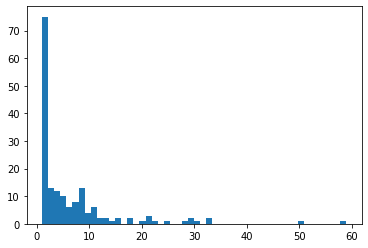

In [378]:
data_count = []
for exon in whole_dict_exc:
    data_count.append(len(whole_dict_exc[exon]))
plt.hist(data_count, bins=50)
print(len(data_count), 'out of', len(df_ex_exc))
print('max: ', np.max(data_count))
print('min: ', np.min(data_count))
print('mean: ', np.mean(data_count))
print('less than 10: ', np.sum(np.array(data_count) < 10))

496 out of 1137
max:  56
min:  1
mean:  4.788306451612903
less than 10:  441


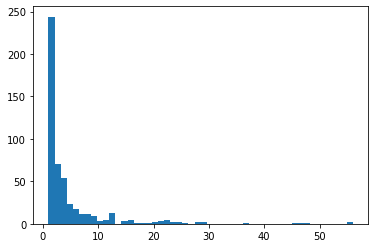

In [379]:
data_count = []
for exon in whole_dict_inc:
    data_count.append(len(whole_dict_inc[exon]))
plt.hist(data_count, bins=50)
print(len(data_count), 'out of', len(df_ex_inc))
print('max: ', np.max(data_count))
print('min: ', np.min(data_count))
print('mean: ', np.mean(data_count))
print('less than 10: ', np.sum(np.array(data_count) < 10))

In [401]:
def get_related_rbps_any(rbps, exon_loci_df, const=500, dict_ocurr={}, strand='+', dict_spans_exon={}, dict_in_exon={}):
    for rbp in rbps:
        df_rbp_both = rbps[rbp]
        df_rbp = df_rbp_both[df_rbp_both[5] == strand]
        for idx, row in df_rbp.iterrows():
            chromosom = row[0]
            start = row[1]
            end = row[2]
            exon_df = exon_loci_df[exon_loci_df['chr']==chromosom]
            
            for exon_idx, exon_row in exon_df.iterrows():
                tup = (int(exon_row['start']), int(exon_row['end']))
                if tup[0] <= end + const or tup[1] >= start - const:
                    if exon_idx in dict_ocurr:
                        dict_ocurr[exon_idx].append(rbp)
                    else:
                        dict_ocurr[exon_idx] = [rbp]
                    
                    if start >= tup[0] and end <= tup[1]:
                        if exon_idx in dict_in_exon:
                            dict_in_exon[exon_idx].append(rbp)
                        else:
                            dict_in_exon[exon_idx] = [rbp]
                            
                    if start <= tup[0] and end >= tup[1]:
                        if exon_idx in dict_spans_exon:
                            dict_spans_exon[exon_idx].append(rbp)
                        else:
                            dict_spans_exon[exon_idx] = [rbp]


In [382]:
whole_dict_exc_any = {}
get_related_rbps_any(rbp_dict, df_ex_exc_pos, const=1000, dict_ocurr=whole_dict_exc_any, strand='+')
get_related_rbps_any(rbp_dict, df_ex_exc_neg, const=1000, dict_ocurr=whole_dict_exc_any, strand='-')

In [383]:
whole_dict_inc_any = {}
get_related_rbps_any(rbp_dict, df_ex_inc_pos, const=1000, dict_ocurr=whole_dict_inc_any, strand='+')
get_related_rbps_any(rbp_dict, df_ex_inc_neg, const=1000, dict_ocurr=whole_dict_inc_any, strand='-')

357 out of 357
max:  25013
min:  2367
mean:  10512.873949579833
less than 10:  0


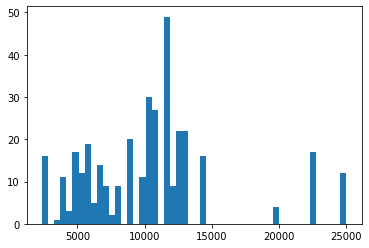

In [385]:
data_count = []
for exon in whole_dict_exc_any:
    data_count.append(len(whole_dict_exc_any[exon]))
plt.hist(data_count, bins=50)
print(len(data_count), 'out of', len(df_ex_exc))
print('max: ', np.max(data_count))
print('min: ', np.min(data_count))
print('mean: ', np.mean(data_count))
print('less than 10: ', np.sum(np.array(data_count) < 10))

1137 out of 1137
max:  25013
min:  2367
mean:  10582.368513632366
less than 10:  0


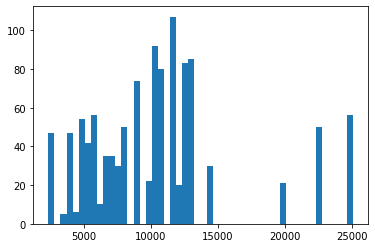

In [386]:
data_count = []
for exon in whole_dict_inc_any:
    data_count.append(len(whole_dict_inc_any[exon]))
plt.hist(data_count, bins=50)
print(len(data_count), 'out of', len(df_ex_inc))
print('max: ', np.max(data_count))
print('min: ', np.min(data_count))
print('mean: ', np.mean(data_count))
print('less than 10: ', np.sum(np.array(data_count) < 10))

In [402]:
whole_dict_exc_any = {}
whole_dict_spans_exon = {}
whole_dict_in_exon = {}
get_related_rbps_any(rbp_dict, df_ex_exc_pos, const=500, dict_ocurr=whole_dict_exc_any, strand='+', dict_spans_exon=whole_dict_spans_exon, dict_in_exon=whole_dict_in_exon)
get_related_rbps_any(rbp_dict, df_ex_exc_neg, const=500, dict_ocurr=whole_dict_exc_any, strand='-', dict_spans_exon=whole_dict_spans_exon, dict_in_exon=whole_dict_in_exon)

In [403]:
whole_dict_inc_any = {}
whole_dict_spans_exon = {}
whole_dict_in_exon = {}
get_related_rbps_any(rbp_dict, df_ex_inc_pos, const=500, dict_ocurr=whole_dict_inc_any, strand='+', dict_spans_exon=whole_dict_spans_exon, dict_in_exon=whole_dict_in_exon)
get_related_rbps_any(rbp_dict, df_ex_inc_neg, const=500, dict_ocurr=whole_dict_inc_any, strand='-', dict_spans_exon=whole_dict_spans_exon, dict_in_exon=whole_dict_in_exon)

357 out of 357
max:  25013
min:  2367
mean:  10512.873949579833
less than 10:  0


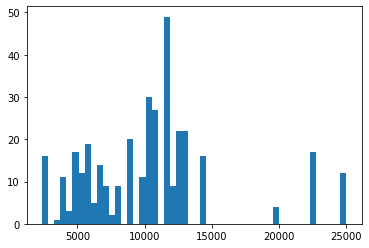

In [390]:
data_count_500 = []
for exon in whole_dict_exc_any:
    data_count_500.append(len(whole_dict_exc_any[exon]))
plt.hist(data_count_500, bins=50)
print(len(data_count_500), 'out of', len(df_ex_exc))
print('max: ', np.max(data_count_500))
print('min: ', np.min(data_count_500))
print('mean: ', np.mean(data_count_500))
print('less than 10: ', np.sum(np.array(data_count_500) < 10))

1137 out of 1137
max:  25013
min:  2367
mean:  10582.368513632366
less than 10:  0


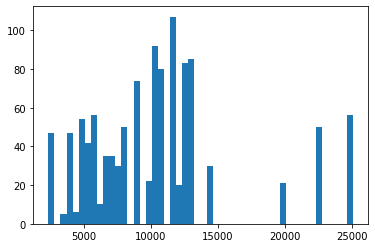

In [391]:
data_count_500 = []
for exon in whole_dict_inc_any:
    data_count_500.append(len(whole_dict_inc_any[exon]))
plt.hist(data_count_500, bins=50)
print(len(data_count_500), 'out of', len(df_ex_inc))
print('max: ', np.max(data_count_500))
print('min: ', np.min(data_count_500))
print('mean: ', np.mean(data_count_500))
print('less than 10: ', np.sum(np.array(data_count_500) < 10))

30 out of 357
max:  7
min:  1


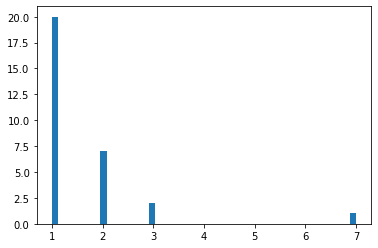

In [406]:
data_count_500 = []
for exon in whole_dict_spans_exon:
    data_count_500.append(len(whole_dict_spans_exon[exon]))
plt.hist(data_count_500, bins=50)
print(len(data_count_500), 'out of', len(df_ex_exc))
print('max: ', np.max(data_count_500))
print('min: ', np.min(data_count_500))

229 out of 357
max:  41
min:  1


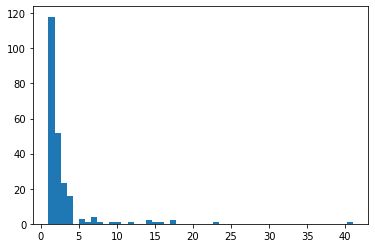

In [407]:
data_count_500 = []
for exon in whole_dict_in_exon:
    data_count_500.append(len(whole_dict_in_exon[exon]))
plt.hist(data_count_500, bins=50)
print(len(data_count_500), 'out of', len(df_ex_exc))
print('max: ', np.max(data_count_500))
print('min: ', np.min(data_count_500))

In [142]:
a = np.array([0.1 * i for i in range(1,7)])
mat = np.array([a, a, a, -a, -a])
print(mat)

svd = np.linalg.svd(mat)
print(svd[0])
print(svd[1])
print(svd[2])
print('-------------')
mat_2 = np.matmul(mat,mat.T)
print(mat_2)

print(np.linalg.eig(np.matmul(mat,mat.T)))

print(np.matmul(a,a))

# v = -a
# u = np.array([-4.47213595e-01, -8.94427191e-01,  2.91957741e-16, 5.15819767e-32,  6.54510008e-48])
# print(np.matmul(u,v.T))

[[ 0.1  0.2  0.3  0.4  0.5  0.6]
 [ 0.1  0.2  0.3  0.4  0.5  0.6]
 [ 0.1  0.2  0.3  0.4  0.5  0.6]
 [-0.1 -0.2 -0.3 -0.4 -0.5 -0.6]
 [-0.1 -0.2 -0.3 -0.4 -0.5 -0.6]]
[[-4.47213595e-01 -8.94427191e-01  2.91957741e-16  5.15819767e-32
   6.54510008e-48]
 [-4.47213595e-01  2.23606798e-01  8.66025404e-01 -4.16333634e-17
  -4.16333634e-17]
 [-4.47213595e-01  2.23606798e-01 -2.88675135e-01 -8.16496581e-01
  -1.01438317e-16]
 [ 4.47213595e-01 -2.23606798e-01  2.88675135e-01 -4.08248290e-01
  -7.07106781e-01]
 [ 4.47213595e-01 -2.23606798e-01  2.88675135e-01 -4.08248290e-01
   7.07106781e-01]]
[2.13307290e+00 1.65498289e-16 2.59384586e-32 8.61979766e-50
 3.66303427e-66]
[[-0.10482848 -0.20965697 -0.31448545 -0.41931393 -0.52414242 -0.6289709 ]
 [ 0.97941235 -0.03919949  0.01965722 -0.07839897 -0.17645516  0.03931444]
 [ 0.16651077  0.1915993  -0.31709223  0.38319861  0.53477592 -0.63418446]
 [ 0.04459275 -0.20169153  0.01269316 -0.74700192  0.6312801   0.02538633]
 [-0.0063025   0.85113021 -0.3

In [144]:
b = np.sum(a**2)
print(b)
b = np.sum(a)**2
print(b)
print(sum(a))

0.9100000000000001
4.41
2.1


In [138]:
print(a)

[0.1 0.2 0.3 0.4 0.5 0.6]


In [139]:
mat = [[0,1,0,0,0],[1,2,3,4,5],[0,3,0,0,0],[0,4,0,0,0],[0,5,0,0,0]]
print(mat)

[[0, 1, 0, 0, 0], [1, 2, 3, 4, 5], [0, 3, 0, 0, 0], [0, 4, 0, 0, 0], [0, 5, 0, 0, 0]]


In [140]:
np.linalg.eig(mat)

(array([ 8.21110255e+00,  1.11022302e-16, -6.21110255e+00,  0.00000000e+00,
         0.00000000e+00]),
 array([[ 9.18932112e-02, -9.90147543e-01, -1.05657375e-01,
          9.90789523e-16, -5.15691706e-16],
        [ 7.54544581e-01,  1.22503097e-17,  6.56248791e-01,
         -5.00349819e-33,  3.40734960e-32],
        [ 2.75679634e-01,  5.94088526e-02, -3.16972125e-01,
         -5.65685425e-01, -7.07106781e-01],
        [ 3.67572845e-01,  7.92118034e-02, -4.22629500e-01,
          7.75322563e-01, -2.80846796e-01],
        [ 4.59466056e-01,  9.90147543e-02, -5.28286875e-01,
         -2.80846796e-01,  6.48941505e-01]]))

# Working with BigWig files:

In [84]:
bw_file = "Data/RBPs/bigwig_files/ENCFF990TDV.bigWig"
import pyBigWig

In [98]:
bw = pyBigWig.open(bw_file)
print(bw.isBigWig())
pyBigWig.numpy

True


1

In [99]:
bw.chroms()

{'chr1': 248956422,
 'chr2': 242193529,
 'chr3': 198295559,
 'chr4': 190214555,
 'chr5': 181538259,
 'chr6': 170805979,
 'chr7': 159345973,
 'chr8': 145138636,
 'chr9': 138394717,
 'chr10': 133797422,
 'chr11': 135086622,
 'chr12': 133275309,
 'chr13': 114364328,
 'chr14': 107043718,
 'chr15': 101991189,
 'chr16': 90338345,
 'chr17': 83257441,
 'chr18': 80373285,
 'chr19': 58617616,
 'chr20': 64444167,
 'chr21': 46709983,
 'chr22': 50818468,
 'chrX': 156040895,
 'chrY': 57227415,
 'chrM': 16569,
 'chr1_KI270706v1_random': 175055,
 'chr1_KI270707v1_random': 32032,
 'chr1_KI270711v1_random': 42210,
 'chr1_KI270712v1_random': 176043,
 'chr1_KI270713v1_random': 40745,
 'chr1_KI270714v1_random': 41717,
 'chr3_GL000221v1_random': 155397,
 'chr4_GL000008v2_random': 209709,
 'chr9_KI270718v1_random': 38054,
 'chr9_KI270719v1_random': 176845,
 'chr9_KI270720v1_random': 39050,
 'chr14_GL000009v2_random': 201709,
 'chr14_GL000225v1_random': 211173,
 'chr14_KI270722v1_random': 194050,
 'chr14_GL00

In [100]:
bw.header()

{'version': 4,
 'nLevels': 10,
 'nBasesCovered': 20072489,
 'minVal': -4215,
 'maxVal': 0,
 'sumData': -15449522,
 'sumSquared': 1366218518}

In [101]:
bw.values('chr1', 549377, 549392)

[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]

In [79]:
np.mean(bw.values('chr1', 49294, 41629))

RuntimeError: Invalid interval bounds!

In [80]:
bw.values("chr1", 0, 3)

[nan, nan, nan]

In [110]:
# bw.intervals("1", 0, 3)
print(bw.intervals("chr1", 258995, 259025))
print(bw.stats("chr1", 258990, 259025, nBins=30))
print(bw.stats("chr1", 258995, 259025, nBins=30, exact=True))
bw.values("chr1", 258995, 259025)

((258995, 258999, -0.8165836334228516), (258999, 259015, -1.0887781381607056), (259015, 259018, -1.9053617715835571), (259018, 259021, -2.177556276321411), (259021, 259025, -2.4497509002685547))
[None, None, None, -0.5443890690803528, -0.5443890690803528, -0.8165836334228516, -0.8165836334228516, -0.8165836334228516, -1.0887781381607056, -1.0887781381607056, -1.0887781381607056, -1.0887781381607056, -1.0887781381607056, -1.0887781381607056, -1.0887781381607056, -1.0887781381607056, -1.0887781381607056, -1.0887781381607056, -1.0887781381607056, -1.0887781381607056, -1.0887781381607056, -1.0887781381607056, -1.9053617715835571, -1.9053617715835571, -2.177556276321411, -2.177556276321411, -2.177556276321411, -2.4497509002685547, -2.4497509002685547, -2.4497509002685547]
[-0.8165836334228516, -0.8165836334228516, -0.8165836334228516, -0.8165836334228516, -1.0887781381607056, -1.0887781381607056, -1.0887781381607056, -1.0887781381607056, -1.0887781381607056, -1.0887781381607056, -1.08877813

[-0.8165836334228516,
 -0.8165836334228516,
 -0.8165836334228516,
 -0.8165836334228516,
 -1.0887781381607056,
 -1.0887781381607056,
 -1.0887781381607056,
 -1.0887781381607056,
 -1.0887781381607056,
 -1.0887781381607056,
 -1.0887781381607056,
 -1.0887781381607056,
 -1.0887781381607056,
 -1.0887781381607056,
 -1.0887781381607056,
 -1.0887781381607056,
 -1.0887781381607056,
 -1.0887781381607056,
 -1.0887781381607056,
 -1.0887781381607056,
 -1.9053617715835571,
 -1.9053617715835571,
 -1.9053617715835571,
 -2.177556276321411,
 -2.177556276321411,
 -2.177556276321411,
 -2.4497509002685547,
 -2.4497509002685547,
 -2.4497509002685547,
 -2.4497509002685547]

In [142]:
a = bw.stats("chr1", 258995, 259025, nBins=30)
print(a)
print('----------')
a = bw.stats("chr1", 258955, 259025, nBins=6)
print(a)
print('----------')
a = bw.stats("chr1", 258995, 259025, nBins=6)
print(a)
print('----------')

a = np.array(a)
a[a == None] = 0.0
print(a)

[-0.8165836334228516, -0.8165836334228516, -0.8165836334228516, -0.8165836334228516, -1.0887781381607056, -1.0887781381607056, -1.0887781381607056, -1.0887781381607056, -1.0887781381607056, -1.0887781381607056, -1.0887781381607056, -1.0887781381607056, -1.0887781381607056, -1.0887781381607056, -1.0887781381607056, -1.0887781381607056, -1.0887781381607056, -1.0887781381607056, -1.0887781381607056, -1.0887781381607056, -1.9053617715835571, -1.9053617715835571, -1.9053617715835571, -2.177556276321411, -2.177556276321411, -2.177556276321411, -2.4497509002685547, -2.4497509002685547, -2.4497509002685547, -2.4497509002685547]
----------
[None, None, None, -0.8165836185216904, -1.0887781381607056, -2.018776168425878]
----------
[-0.8710225343704223, -1.0887781381607056, -1.0887781381607056, -1.0887781381607056, -2.0142395734786986, -2.395311975479126]
----------
[-0.87102253 -1.08877814 -1.08877814 -1.08877814 -2.01423957 -2.39531198]


In [114]:
print(np.array(a) + np.array([i for i in range(35)]))

TypeError: unsupported operand type(s) for +: 'NoneType' and 'int'

In [128]:
a = bw.intervals("chr1", 258975, 258995)
if a is None:print('No')